<a href="https://colab.research.google.com/github/TNLE01/MLA_TNL/blob/main/MLA5_TNL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# Machine Learning Assignment #  
**Your Name**  

## Standard Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [5]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier

## Imports for Splitting Data and Building Pipeline


In [6]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [8]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [9]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [11]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS 430/MLA/MLA 5/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS 430/MLA/MLA 5/landsat_test.csv')

### Statistical and Visual Exploration

Text(0, 0.5, 'Count')

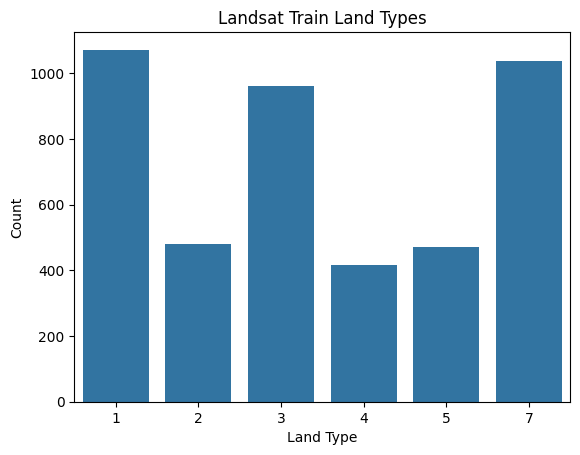

In [15]:
sns.countplot(x='land_type', data=landsat_train)
plt.title('Landsat Train Land Types')
plt.xlabel('Land Type')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

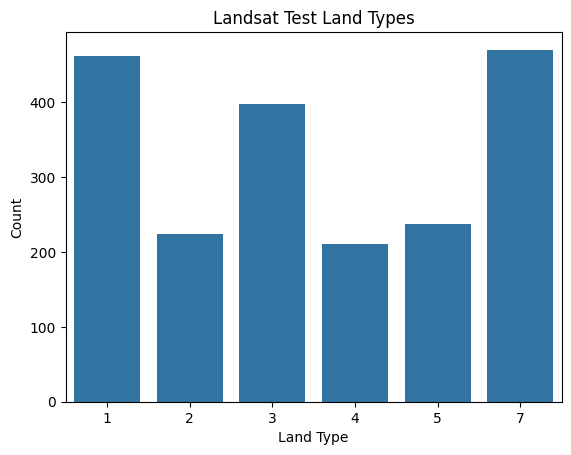

In [16]:
sns.countplot(x='land_type', data=landsat_test)
plt.title('Landsat Test Land Types')
plt.xlabel('Land Type')
plt.ylabel('Count')

### Splitting Data into Train/Test

In [18]:
X_train = landsat_train.drop('land_type', axis=1)
y_train = landsat_train['land_type']

X_test = landsat_test.drop('land_type', axis=1)
y_test = landsat_test['land_type']

### Building the Pipeline

In [23]:
numerical_features = X_train.select_dtypes(include=['number']).columns

In [24]:
ct = ColumnTransformer([
        ('scaler', MinMaxScaler(), numerical_features),
    ])

In [25]:
pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('classifier', RandomForestClassifier(random_state=42))
])

### Executing the Model

In [26]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

### Evaluating Model

In [27]:
y_pred = pipeline.predict(X_test)

In [28]:
print(precision_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='weighted'))

0.9100260253371064
0.912
0.9101785248440142


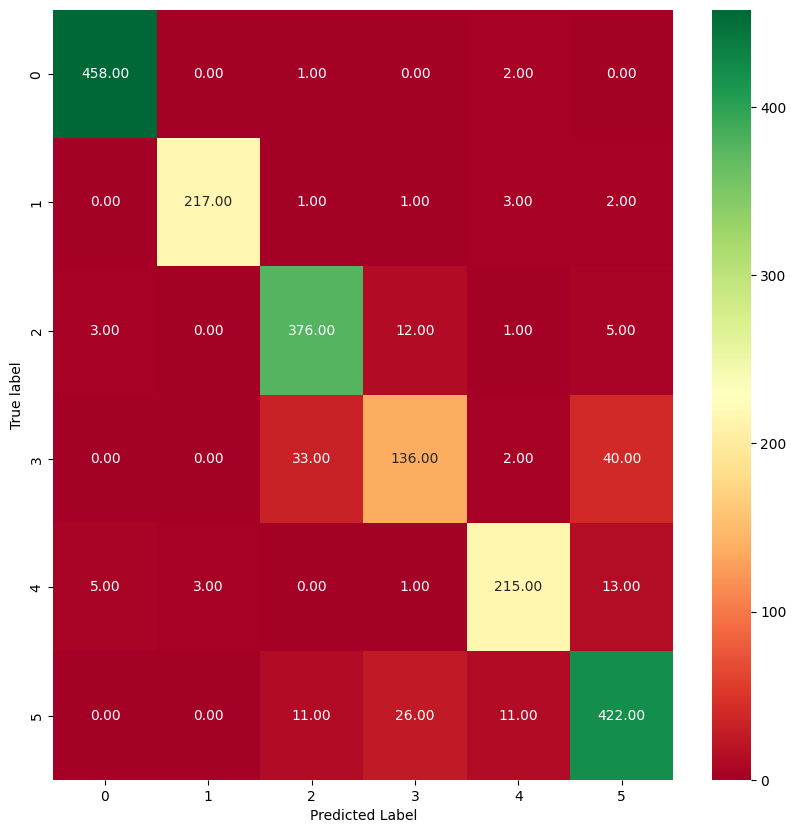

In [29]:
plot_cm(y_test, y_pred)

### Conclusion
Write a general conclusion about the results of your model.

All of the precision score, recall score, and f1 scores are at around 91%, meaning that the model is very suitable in predicting the land type. The heatmap also shows that the data is pretty good at predicting given that the colors are highest when the True label and the Predicted label match.

## Problem 2

### Reading the Data

In [30]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS 430/MLA/MLA 5/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS 430/MLA/MLA 5/landsat_test.csv')

### Splitting Data into Train/Test

In [31]:
X_train = landsat_train.drop('land_type', axis=1)
y_train = landsat_train['land_type']

X_test = landsat_test.drop('land_type', axis=1)
y_test = landsat_test['land_type']

### Building the Pipeline

In [32]:
numerical_features = X_train.select_dtypes(include=['number']).columns

In [33]:
ct = ColumnTransformer([
        ('scaler', MinMaxScaler(), numerical_features),
    ])

In [36]:
pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('classifier', BaggingClassifier(random_state=42))
])

### Executing the Model

In [37]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier', BaggingClassifier(random_state=42))])

### Evaluating Model

In [38]:
y_pred = pipeline.predict(X_test)

In [39]:
print(precision_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='weighted'))

0.8796343816761073
0.882
0.8799302706574026


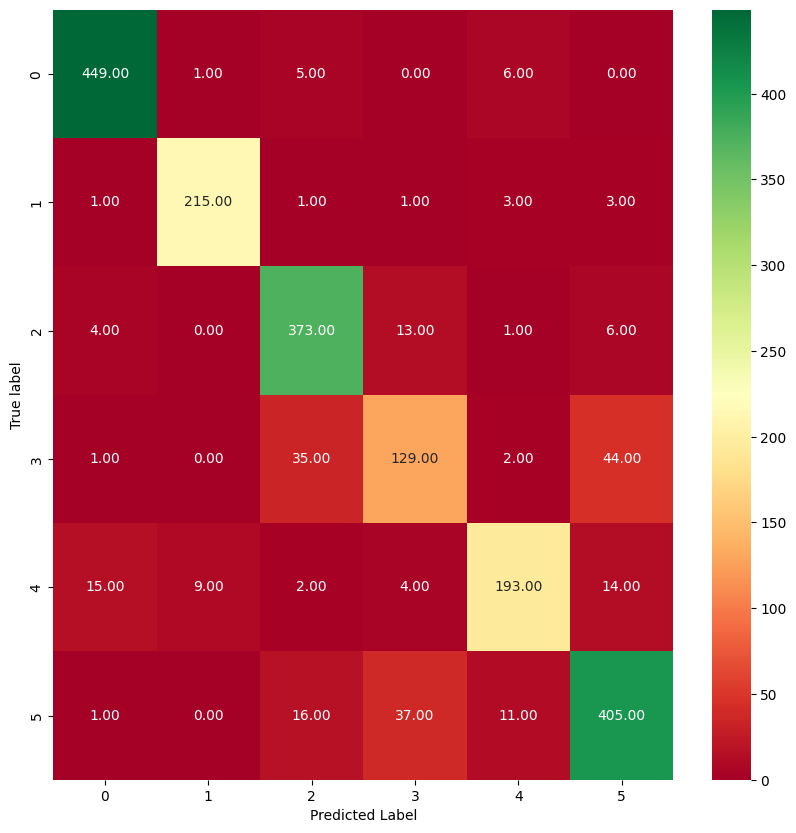

In [40]:
plot_cm(y_test, y_pred)

### Conclusion
Write a general conclusion about the results of your model.

All of the precision score, recall score, and f1 scores are at around 88%, meaning that the model is suitable in predicting the land type. The heatmap also shows that the data is pretty good at predicting given that the colors are highest when the True label and the Predicted label match. Looking at only the scores though, the random forest seem to have done better with around +3% higher scores.

## Problem 3

### Reading the Data

In [44]:
df = pd.read_csv('/content/gdrive/MyDrive/CS 430/MLA/MLA 5/banknote_authentication.csv')

### Statistical and Visual Exploration

Text(0, 0.5, 'Count')

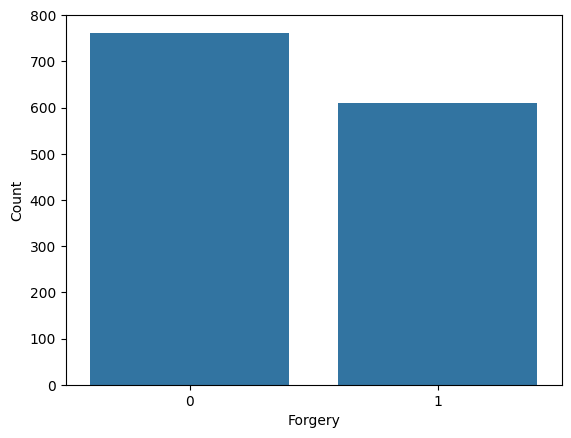

In [46]:
sns.countplot(x='forgery', data = df)
plt.xlabel('Forgery')
plt.ylabel('Count')

### Splitting Data into Train/Test

In [47]:
X = df.drop('forgery', axis=1)
y = df['forgery']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [49]:
numerical = ['variance', 'skewness', 'curtosis', 'entropy']
ct = ColumnTransformer(
        transformers=[
        ('num', MinMaxScaler(), numerical)
    ])

In [50]:
ct = ColumnTransformer(
        transformers=[
        ('num', MinMaxScaler(), numerical)
    ])

In [51]:
pipeline = Pipeline([
    ('ColumnTransformer', ct),
    ('classifier', RandomForestClassifier(random_state=42))
])

### Executing the Model

In [52]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

### Evaluating Model

In [53]:
y_pred = pipeline.predict(X_test)

In [54]:
print(precision_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='weighted'))

0.9928242424242424
0.9927272727272727
0.9927228178234889


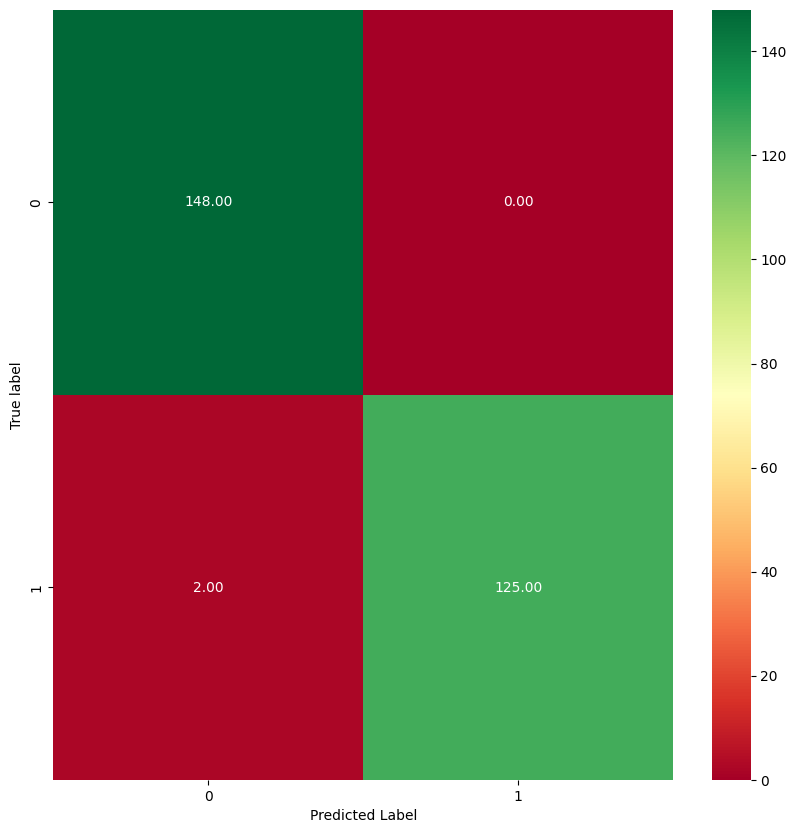

In [55]:
plot_cm(y_test, y_pred)

### Conclusion
Write a general conclusion about the results of your model.

All of the precision score, recall score, and f1 scores are at around 99%, meaning that the model is extremely suitable in predicting the land type. The heatmap also shows that the data is pretty good at predicting given that the colors are highest when the True label and the Predicted label match.